**Description**: Analyze accuracies for $m = 100, n = 500$.

**Estimated runtime**: ~30 min. (Multi-core isn't working on my machine. Set `cores=4`
in the `model.fit` call if it works for you.)

In [1]:
import os
import sys
from typing import Literal

import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 500

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_from_paper")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
equation = "p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)"
id_vars = ["num_test", "pair", "lm_type", "dataset"]

# Plot

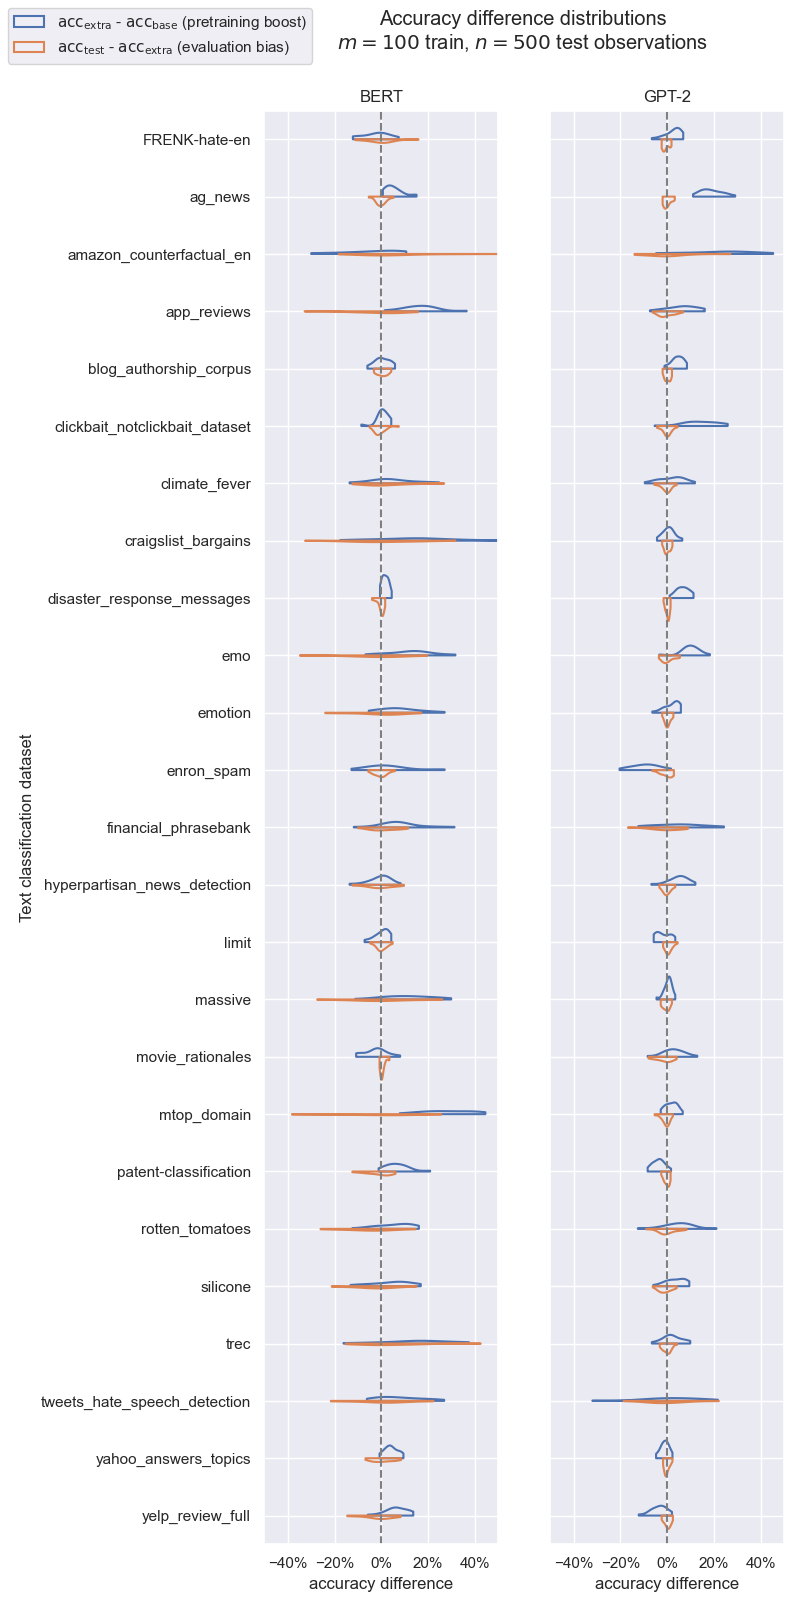

In [6]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train)

# Pretraining boost

In [7]:
summary_boost, summary_relative_boost = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.050082 ┆ 0.009035 │
└──────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.211253 ┆ 0.046703 │
└──────────┴──────────┘


In [8]:
summary_boost

dataset,mean,se
"""FRENK-hate-en""",0.00015,0.012179
"""ag_news""",0.12035,0.017956
"""amazon_counterfactual_en""",0.09565,0.041538
"""app_reviews""",0.11375,0.019218
"""blog_authorship_corpus""",0.0234,0.007934
…,…,…
"""silicone""",0.039,0.015265
"""trec""",0.09185,0.028421
"""tweets_hate_speech_detection""",0.04965,0.025216
"""yahoo_answers_topics""",0.0152,0.008047


In [9]:
summary_relative_boost

dataset,mean,se
"""FRENK-hate-en""",0.005007,0.02158
"""ag_news""",0.241968,0.045505
"""amazon_counterfactual_en""",0.299053,0.122732
"""app_reviews""",0.875088,0.140743
"""blog_authorship_corpus""",0.049259,0.015833
…,…,…
"""silicone""",0.081492,0.028335
"""trec""",0.462132,0.140411
"""tweets_hate_speech_detection""",0.087765,0.041152
"""yahoo_answers_topics""",0.154844,0.074238


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 462 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.14353,0.13154,-0.07325,0.34450,0.00261,0.00192,2548.83263,2583.74295,1.00204
1|dataset:method[FRENK-hate-en:extra],-0.12832,0.13179,-0.33595,0.08067,0.00266,0.00198,2457.72545,2672.06161,1.00144
1|dataset:method[ag_news:base],-0.13566,0.13189,-0.35466,0.06633,0.00266,0.00209,2471.70984,2081.01075,1.00147
1|dataset:method[ag_news:extra],0.16413,0.13235,-0.05054,0.36828,0.00272,0.00195,2385.18772,2321.53205,1.00111
1|dataset:method[amazon_counterfactual_en:base],-0.07357,0.12908,-0.26993,0.14113,0.00278,0.00196,2168.10103,2442.78358,1.00247
1|dataset:method[amazon_counterfactual_en:extra],0.09435,0.13011,-0.12187,0.29232,0.00277,0.00198,2209.86020,2530.03614,1.00212
1|dataset:method[app_reviews:base],-0.24448,0.12785,-0.43919,-0.04334,0.00233,0.00174,3005.30144,2619.89843,1.00084
1|dataset:method[app_reviews:extra],0.21218,0.12704,0.00931,0.40972,0.00230,0.00168,3066.03662,2276.45172,1.00167
1|dataset:method[blog_authorship_corpus:base],0.09217,0.13360,-0.11196,0.30646,0.00284,0.00201,2217.49104,2290.83636,1.00065
1|dataset:method[blog_authorship_corpus:extra],-0.08545,0.13320,-0.28763,0.12679,0.00282,0.00210,2237.66876,2406.39879,1.00016


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


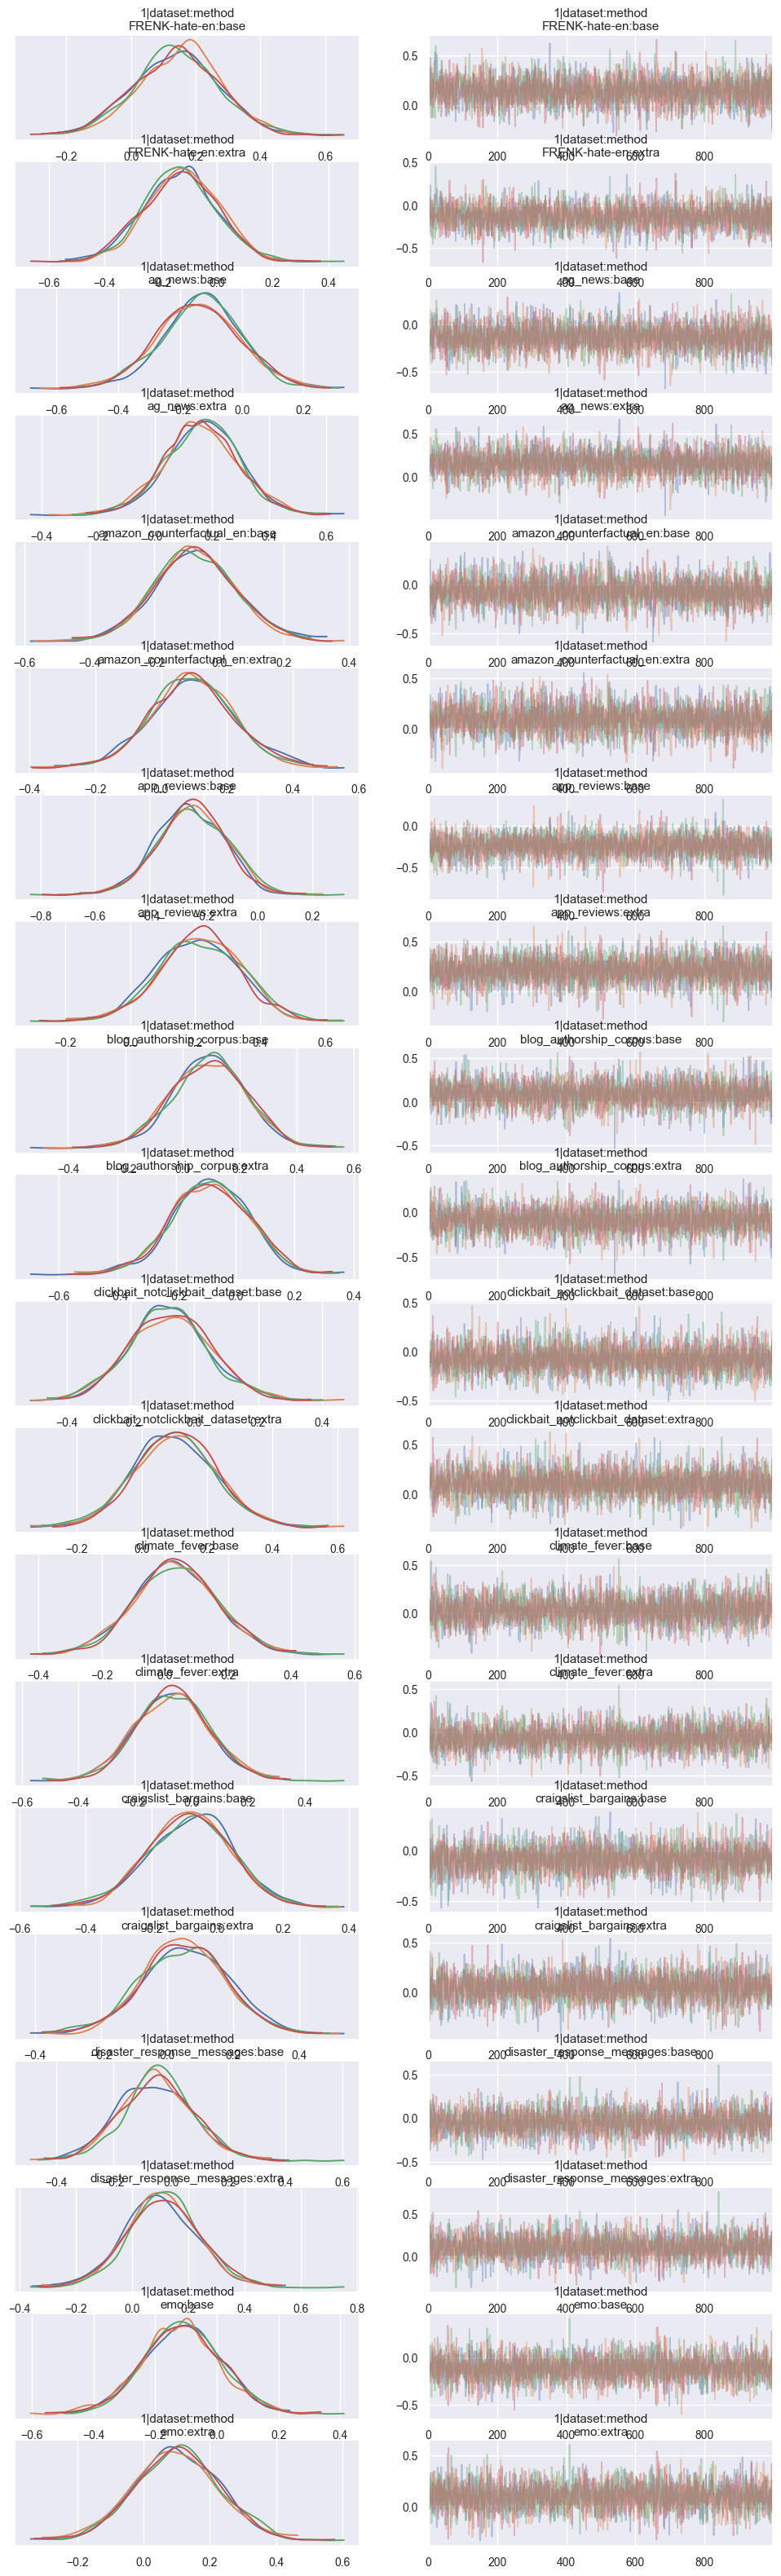

In [10]:
model_boost, summary_boost, az_summary_boost = utils.fit_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [11]:
print(model_boost)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Evaluation bias

In [12]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌───────────┬──────────┐
│ mean      ┆ se       │
╞═══════════╪══════════╡
│ -0.001834 ┆ 0.002254 │
└───────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.021576 ┆ 0.011069 │
└──────────┴──────────┘


In [13]:
summary_bias

dataset,mean,se
"""FRENK-hate-en""",-0.00085,0.010208
"""ag_news""",-0.0003,0.004285
"""amazon_counterfactual_en""",0.0263,0.030146
"""app_reviews""",-0.0036,0.018418
"""blog_authorship_corpus""",0.0028,0.003893
…,…,…
"""silicone""",-0.02005,0.01511
"""trec""",0.01755,0.02139
"""tweets_hate_speech_detection""",0.00255,0.02263
"""yahoo_answers_topics""",0.0028,0.0073


In [14]:
summary_relative_bias

dataset,mean,se
"""FRENK-hate-en""",0.001534,0.019202
"""ag_news""",-0.000011,0.005613
"""amazon_counterfactual_en""",0.080184,0.073573
"""app_reviews""",0.021547,0.063065
"""blog_authorship_corpus""",0.005176,0.00735
…,…,…
"""silicone""",-0.027684,0.023877
"""trec""",0.084645,0.083192
"""tweets_hate_speech_detection""",0.016488,0.035837
"""yahoo_answers_topics""",0.038946,0.05542


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, lm_type, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 400 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],-0.00143,0.02853,-0.04411,0.04553,0.00044,0.00043,4322.40598,3208.74468,1.00110
1|dataset:method[FRENK-hate-en:test],0.00235,0.02825,-0.03922,0.05168,0.00045,0.00039,4026.93913,3191.74917,1.00240
1|dataset:method[ag_news:extra],-0.00263,0.02867,-0.04716,0.04276,0.00042,0.00042,4617.00835,3216.57270,1.00241
1|dataset:method[ag_news:test],0.00321,0.02832,-0.03974,0.05035,0.00042,0.00042,4586.47566,3222.93755,1.00211
1|dataset:method[amazon_counterfactual_en:extra],-0.05881,0.02923,-0.10316,-0.01100,0.00045,0.00033,4179.88879,2920.81304,0.99988
1|dataset:method[amazon_counterfactual_en:test],0.06098,0.02877,0.01790,0.10775,0.00046,0.00035,3930.35161,3093.63536,1.00023
1|dataset:method[app_reviews:extra],0.00422,0.02914,-0.03924,0.05398,0.00051,0.00043,3288.19960,2844.47112,1.00004
1|dataset:method[app_reviews:test],-0.00472,0.02877,-0.05019,0.04175,0.00047,0.00040,3735.07032,3065.03519,1.00123
1|dataset:method[blog_authorship_corpus:extra],-0.00828,0.02811,-0.05414,0.03510,0.00042,0.00038,4429.63304,3318.37602,1.00045
1|dataset:method[blog_authorship_corpus:test],0.00896,0.02821,-0.03302,0.05461,0.00045,0.00040,4015.26074,3389.30167,0.99978


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


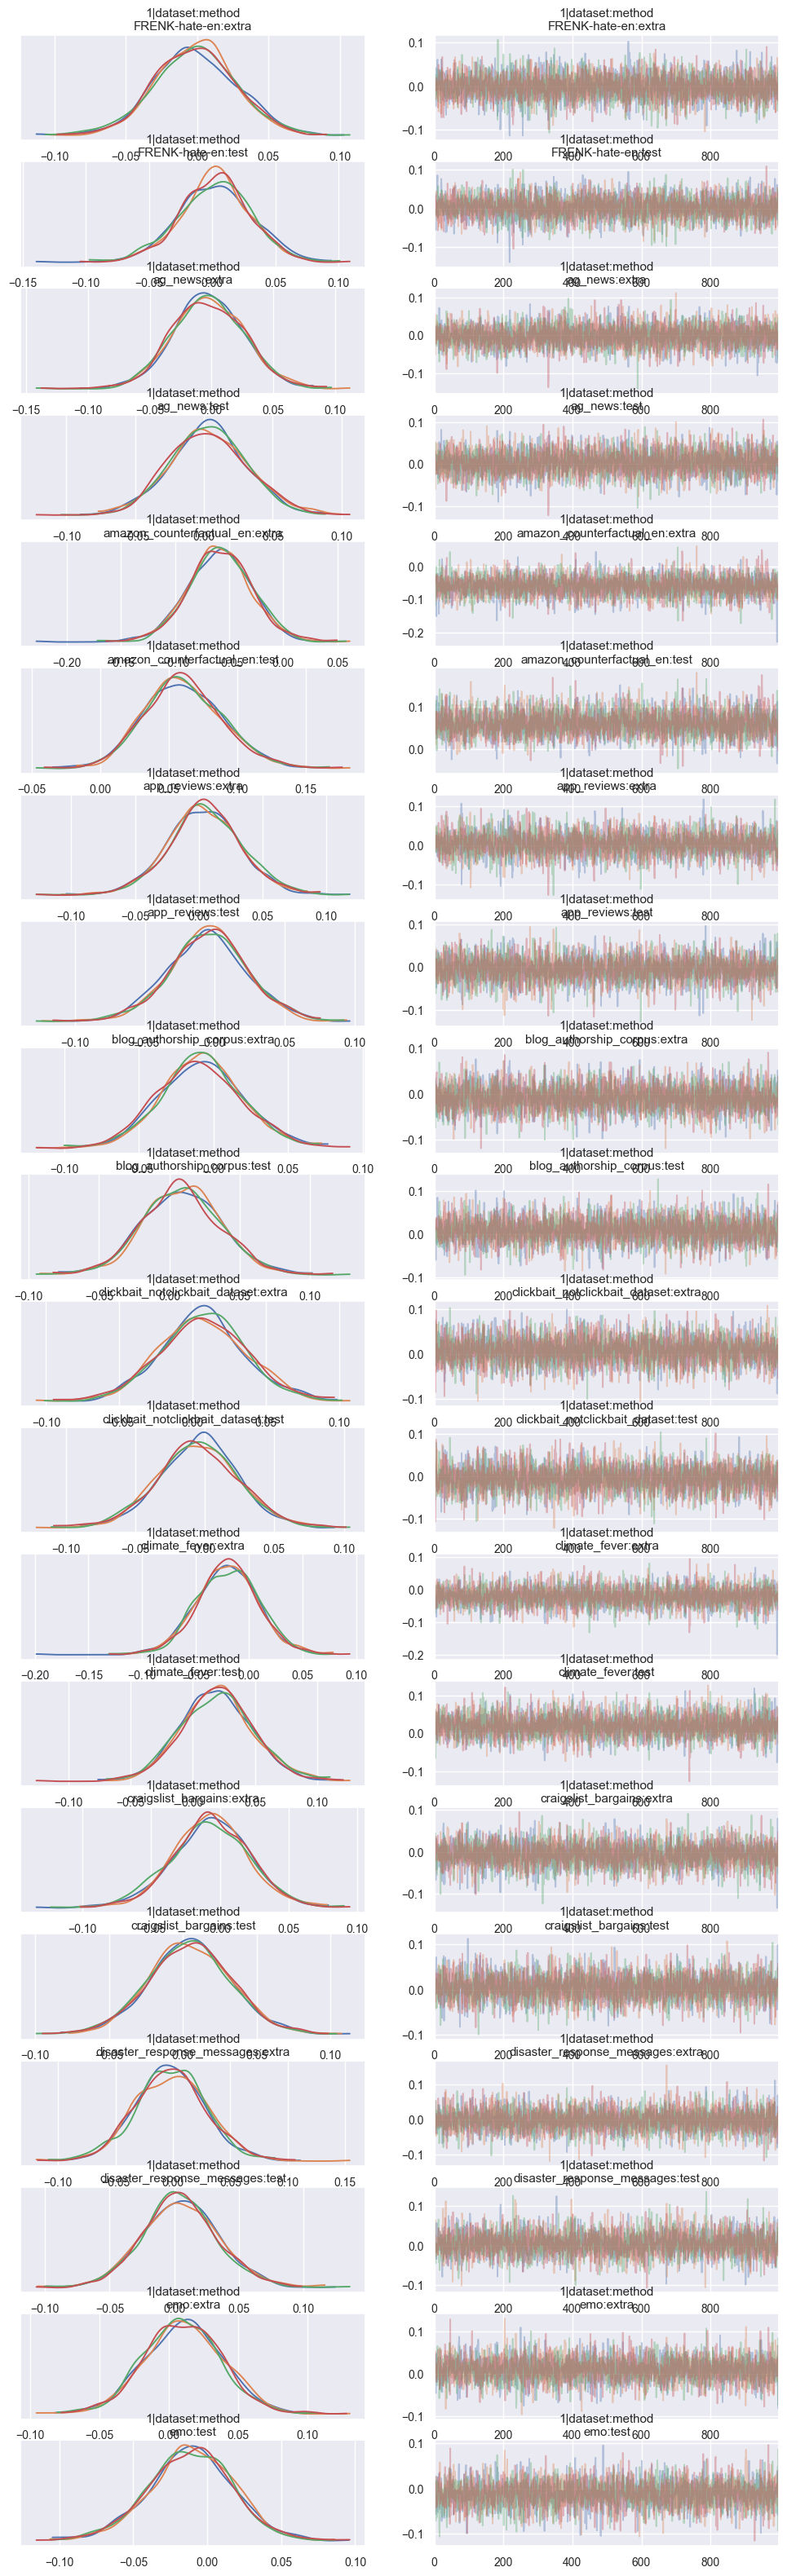

In [15]:
model_bias, summary_bias, az_summary_bias = utils.fit_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [16]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + lm_type + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 2000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
            lm_type ~ Normal(mu: 0.0, sigma: 5.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 3.5355))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [17]:
netcdfs = os.path.join("..", "..", "netcdfs", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.mkdir(netcdfs)

In [18]:
summary_boost.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_boost.nc")
)

'../../netcdfs/m100/main_m100_n500_boost.nc'

In [19]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_bias.nc")
)

'../../netcdfs/m100/main_m100_n500_bias.nc'